In [119]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import csv

def h_fun(X, theta):
    z = theta.T @ X
    h = 1.0 / (1.0 + np.exp(-z))
    return h

def calculate(X, y, theta):
    h = h_fun(X, theta)
    y_1 = -y*np.log(h)
    y_0 = -(1-y)*np.log(1-h)
    return (y_1 + y_0).sum() / X.shape[1]

def get_theta(X, y, eps, alpha, theta, maxite=200000): 
    cost = 1
    ite=0
    while 1:
        h_y_diff = (h_fun(X, theta) - y)
        gradient = h_y_diff @ X.T
        
        m = h_y_diff.shape[1]
        theta = theta - ((alpha * gradient.T) / m) 
        
        previousCost = cost
        cost = calculate(X, y, theta)
        ite = ite+1
        if abs(previousCost - cost) < eps or ite>maxite :
            break
    return cost,theta

In [118]:
with open("./logi_reg_training.csv") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y = data[:, 2:3].T
    x1 = data[:, :1].T
    x2 = data[:, 1:2].T
    X = np.concatenate([np.ones([1, x1.shape[1]]), x1, x2, x1**2, x1**3])
    

plt.figure()
plt.scatter(X[1,:], X[2,:], c=y, cmap="viridis")
plt.grid()

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

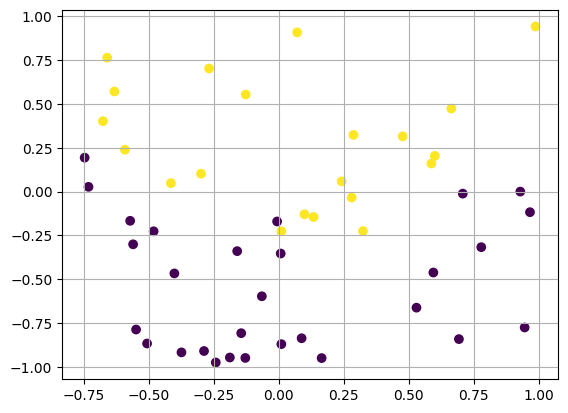

In [108]:
'''
X_max = X.max(axis=1)
X_max.shape = [X_max.shape[0], 1]
X_min = X.min(axis=1)
X_min[0] = 0
X_min.shape = [X_min.shape[0], 1]
X = (X - X_min) / (X_max - X_min)
'''
plt.figure()
plt.scatter(X[1,:], X[2,:], c=y, cmap="viridis")
plt.grid()






In [109]:
eps = 1e-9  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 
alpha = 0.0035  # learning rate
theta, cost = get_theta(X, y, eps, alpha, np.array([[0],[0],[0],[0],[0]]))
print(theta, cost)

0.11935746279643024 [[ 2.44165   ]
 [ 2.27601092]
 [ 9.69771222]
 [-7.30958319]
 [-1.76215441]]


cost 0.11935746279643024
[[ 2.44165   ]
 [ 2.27601092]
 [ 9.69771222]
 [-7.30958319]
 [-1.76215441]]
-0.7456800565974451


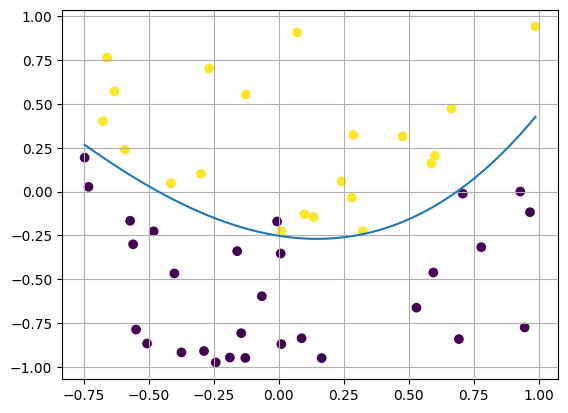

In [110]:
print("cost", theta)
theta = cost
print(theta)

print(X[1,:].min())
x1_db = np.arange(X[1,:].min(), X[1,:].max(), 0.001)
x2_db = -theta[0,0]/theta[2,0] - theta[1,0]/theta[2,0]*x1_db - theta[3,0]/theta[2,0]*x1_db**2 - theta[4,0]/theta[2,0]*x1_db**3

plt.figure()
plt.plot(x1_db, x2_db)
plt.scatter(X[1,:], X[2,:], c=y, cmap="viridis")
plt.grid()

In [114]:
with open("./logi_reg_training.csv") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y = data[:, 2:3].T
    x1 = data[:, :1].T
    x2 = data[:, 1:2].T
    
x1.shape = [-1,1]
    
data = data[:,:2]

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=6)
afterEnlargement = poly_features.fit_transform(x1)
afterEnlargement = afterEnlargement.T



In [115]:
firstPart = afterEnlargement[:2,:]
secondPart = x2
secondPart.shape = [1,-1]
thirtyPart = afterEnlargement[2:, :] 

result = np.concatenate((firstPart, secondPart, thirtyPart), axis=0)

In [116]:
eps = 1e-9  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 
alpha = 0.0035  # learning rate
cost, theta = get_theta(result, y, eps, alpha, np.array([[0],[0],[0],[0],[0],[0],[0],[0]]))
print(theta)

[[ 2.47040826]
 [ 2.20138262]
 [10.20212811]
 [-5.11263009]
 [-0.70695442]
 [-3.62843729]
 [-0.426016  ]
 [-2.10401265]]


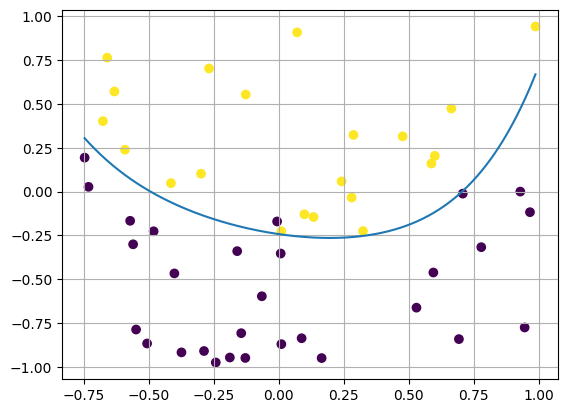

In [117]:
x1_db = np.arange(X[1,:].min(), X[1,:].max(), 0.001)
x2_db = -theta[0,0]/theta[2,0] - theta[1,0]/theta[2,0]*x1_db - theta[3,0]/theta[2,0]*x1_db**2 - theta[4,0]/theta[2,0]*x1_db**3- theta[5,0]/theta[2,0]*x1_db**4 - theta[6,0]/theta[2,0]*x1_db**5 - theta[7,0]/theta[2,0]*x1_db**6

plt.figure()
plt.plot(x1_db, x2_db)
plt.scatter(X[1,:], X[2,:], c=y, cmap="viridis")
plt.grid()


In [ ]:
standard_scaler = StandardScaler()
x1_range = np.linspace(x1.min(), x1.max(), 100)
x2_range = np.linspace(x2.min(), x2.max(), 100)
x1x1, x2x2 = np.meshgrid(x1_range, x2_range)
points = np.c_[x1x1.ravel(), x2x2.ravel()]


x1x2_range_comb = standard_scaler.transform(points)
x1x2_range_comb = poly_features.transform(x1x2_range_comb)
X_range_comb = x1x2_range_comb.T
h_range_comb = h_fun(X_range_comb, theta)
h_range_comb.shape = x1x1.shape
plt.contour(x1x1, x2x2, h_range_comb, levels=[0.5], colors='g')